# Buy It Again: Modeling Repeat Purchase Recommendations

 <li/>Buy It Again은 고객의 반복 구매주기를 기반으로 상품을 제안하는 추천 모델 입니다.<br/>
 
 KDD 2018에서 발표된 [Buy It Again: Modeling Repeat Purchase Recommendations(amazon)](https://www.kdd.org/kdd2018/accepted-papers/view/buy-it-again-modeling-repeat-purchase-recommendations)을<br/>
 기반으로 위메프에 특화되도록 알고리즘을 변형하여 하나의 추천 시스템으로 내재화하였습니다.

<img src="다시찾고싶은.jpg" alt="Drawing" style="width: 300px;"/>

---

# Modeling Approach

**접근법** : 고객의 과거 구매 패턴을 살펴, 반복 구매 시기를 적절하게 제안

- 임의의 상품 $A_i$가 존재할때 고객의 해당 상품의 k번째 과거 구매주기를 $t_k$ 라 정의한다면, <br/>마지막 구매 시점으로부터 $t$시점이 경과하였을때 상품 $A_i$를 구매할 확률을 식(1)과 같이 정의한다.

<img src="equation_1.png" alt="Drawing" style="width: 470px;"/>

- 해당 논문에서는 식(1)을 식(2)와 같이 두 가지 요소로 분해 가능하다 가정한다.
> - '제품의 구매매력도' : $Q(A_i)$
> - '마지막 구매시점으로부터 t시점이 경화였을때 상품 구매확률' : $R_{A_i}(t_{k+1})$

<img src="equation_2.png" alt="Drawing" style="width: 600px;"/>

---

# Poisson-Gamma Model 

모델 가정
- (1) 고객의 반복 구매 행위는, 반복구매율이 $\lambda$ 인 Poisson's process 를 따른다. ( **연속적인 구매가 서로 not-correlated** )


- (2) 모든 고객들의 $\lambda$ 는 shape α, rate β 인 Gamma 분포를 따른다.

> 따라서, Poisson-Gamma 모델은 likelihood 가 Poission 이고, prior가 gamma-prior인 Bayesian 모델이다.

---

- 식 (7) : 고객들의 반복 구매율(repeat purchase rate : $\lambda$) Bayesian 추정량 : **고객 $C_j$ 의 측면에서 업데이트**
> - $\alpha_{A_i}$, $\beta_{A_i}$ : 상품 $A_i$의 gamma prior<br/>
> - $k$     : 상품 $A_i$에 대한 고객 $C_j$ 의 구매횟수
> - $t$     : 상품 $A_i$에 대한 고객 $C_j$ 의 첫 구매후 경과시간

<img src="equation_7.png" alt="Drawing" style="width: 500px;"/>
---

---

- 식 (8) : 고객 $C_j$ 추정된 반복 구매율($\lambda$)를 통해, 해당 고객의 상품 $A_i$ 구매 확률 계산

<font size="4"> $\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad
R_{A_{i},C_{j}}(t) =  \displaystyle \sum_{m=1}^\infty\frac{\lambda_{A_{i},C_{j}}^{m}exp(-\lambda_{A_{i},C_{j}})}{m!},   t>0 \quad \quad \quad (8)
$</font>       

---

- **Poisson-Gamma 모델의 한계**

> : 직관에 반하는 가정들이 존재

- 연속적인 반복 구매 행위는 서로 연관되지 않는다.(time-independent : uncorrelated)


- 나아가, 반복 구매율 $\lambda$를 추정하는 과정에서 **'구매 직후'**에 $\lambda$가 가장 크게 추정된다.

> 실제로는 구매 직후에 해당 고객에게 해당 상품의 필요도는 줄어들것이란 직관과 반대된다.
> - Before the purchase :<font size="5"> $\frac{(k−1+α)}{(t^{−}+β)} < $</font>  right after the purchase : <font size="5"> $\frac{(k+α)}{(t^{+}+β)}$</font>

---

# Modified Poisson-Gamma Model

모델 가정<br/>
- (1) 고객들의 연속적인 구매는 서로 연관되어있으며(correlated) <br/>반복 구매율($\lambda$)은 고객의 해당 상품의 **'마지막 구매 시간'**에 의존적인 Modified-Poisson-process를 따른다.



- (2) 모든 고객들의 $\lambda$ 는 shape α, rate β 인 Gamma 분포를 따른다.

---

- 식 (9) : 고객들의 반복 구매율(repeat purchase rate : $\lambda$) Bayesian 추정량 : **고객 $C_j$ 의 측면에서 업데이트**
> - $\alpha_{A_i}$, $\beta_{A_i}$ : 상품 $A_i$의 gamma prior<br/>
> - $k$     : 상품 $A_i$에 대한 고객 $C_j$ 의 구매횟수
> - $t_{purch}$     : 상품 $A_i$에 대한 고객 $C_j$ 의 **'첫 구매'**로부터 **'마지막 구매'**까지의 경과시간
> - $t_{mean}$ : 상품 $A_i$에 대한 고객 $C_j$의 **'평균 반복 구매 interval'**
> - $t$ : 상품 $A_i$에 대한 고객 $C_j$의 **'마지막 구매 시점으로부터 경과시간'**

<img src="equation_9.png" alt="Drawing" style="width: 500px;"/>

<img src="equation_7.png" alt="Drawing" style="width: 470px;"/>
---

<img src="lambda_time.png" alt="Drawing" style="width: 500px;"/>

---
---

# Buy it again 모델 적용 step
<br/>
<br/>
<br/>
![title](./그림1.png)


![title](./그림2.png)


---

---

# 위메프 데이터 적용

### # "241,010,102       : 기저귀" 를 통한, 추천 score 계산 흐름 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/we/OneDrive/OneDrive - Wemakeprice Inc/위메프_공유/위메프/18년도/buyitagain_업무/buy_it_again_분석'

---

### # 훈련데이터와 test 데이터 정의
- train : 2018.01.01 ~ 2018.07.31
- test : 2018.08.01 ~ 2018.09.30

In [3]:
diaper_train = pd.read_excel('diaper_train.xlsx')
diaper_test = pd.read_excel('diaper_test.xlsx')

In [4]:
diaper_train.head(3)

,Unnamed: 0,Unnamed: 0.1,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
0,105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
1,212,212,2018-01-01 00:00:52,"2,683,481","32,000","1,597,856","241,010,102",1
2,2357,2357,2018-01-01 00:03:47,"3,579,286","104,700","1,766,436","241,010,102",1


In [5]:
diaper_test.head(3)

,Unnamed: 0,Unnamed: 0.1,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
0,9110834,99110834,2018-08-01 00:01:02,"4,379,895","6,900","3,873,059","241,010,102",1
1,9111155,99111155,2018-08-01 00:01:29,"25,374,757","81,800","1,573,290","241,010,102",1
2,9111262,99111262,2018-08-01 00:01:37,"10,180,229","36,700","3,875,375","241,010,102",1


---

In [6]:
diaper_train.m_id.nunique()   # 약 20만명(28주 동안)

212550

In [6]:
train_mid = diaper_train.m_id.unique()

In [7]:
diaper_train[diaper_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
3125,3125,2018-01-01 00:04:27,"6,200,018","34,900","1,472,659","241,010,102",1
732522,10732522,2018-01-24 09:44:17,"6,200,018","15,800","3,201,607","241,010,102",1


---

## # RCP

재구매 매력도 (:Repeat Customer Probability)
> - #repeat_customers/#customers

In [7]:
diaper_train.m_id.drop_duplicates().shape[0] # distinct user

212550

In [8]:
diaper_train.m_id[diaper_train.m_id.duplicated()].nunique()  # 2번이상 구매한 user

111408

In [9]:
diaper_train.m_id[diaper_train.m_id.duplicated()].nunique() / diaper_train.m_id.nunique()

0.5241496118560339

---

## Step1. 카테고리 𝐴_𝑖의 모든 개별 구매고객 𝐶_𝑗의 구매 time-interval 추출.

### #  기저귀 time interval 불러오기

In [10]:
groups = diaper_train.groupby('m_id')

In [11]:
def day_diff(data):
    c = data.dt.date.diff()
    return pd.Series(c.values)

In [12]:
groups['biz_dt'].apply(day_diff)

m_id        
1,000,006  0                 NaT
           1    14 days 00:00:00
           2    27 days 00:00:00
           3    22 days 00:00:00
           4    14 days 00:00:00
                      ...       
9,999,834  0                 NaT
           1    43 days 00:00:00
           2    55 days 00:00:00
           3    19 days 00:00:00
           4    11 days 00:00:00
Name: biz_dt, Length: 545775, dtype: object

In [13]:
# day_diff 저장
diaper_diff = groups['biz_dt'].apply(day_diff)  

In [23]:
# day_diff(=time delta)를 int로 바꾼다
diaper_diff = pd.DataFrame(diaper_diff)
diaper_diff.biz_dt = pd.to_timedelta(diaper_diff.biz_dt)  # timedelta 로 저장
diaper_diff['biz_dt'] = diaper_diff['biz_dt'].dt.days # timedelta -> int

In [26]:
diaper_diff.head(10)

biz_dt
m_id               
1,000,006 0     NaN
          1    14.0
          2    27.0
          3    22.0
          4    14.0
1,000,087 0     NaN
          1    14.0
          2    27.0
          3    34.0
          4    33.0

In [27]:
diaper_diff.shape

(545775, 1)

In [29]:
diaper_diff.reset_index().drop(columns = ['m_id', 'level_1'])

,biz_dt
0,NaN
1,14.0
2,27.0
3,22.0
4,14.0
...,...
545770,NaN
545771,43.0
545772,55.0
545773,19.0


---

## Step1. 카테고리 𝐴_𝑖의 모든 개별 구매고객 𝐶_𝑗의 구매 time-interval 추출.

### 고객들의 Time-interval 추출 간 구매 이력이 1회이거나, 동일 일자의 중복 구매 이력 제거 (time-interval 제공 x)
- 구매이력 1회 : time_diff 구할 수 없다
- 동일 일자 중복 구매 : time_diff '0'

In [30]:
tt = diaper_diff.reset_index().drop(columns = ['m_id', 'level_1']).copy()

In [31]:
tt.shape

(545775, 1)

In [32]:
tt = tt.dropna()  # t값 순수하게 얻은거야

In [33]:
# nan값 제거하고 얻은 shape

tt.shape

(333225, 1)

In [34]:
# time 으로 column명 변경
tt.columns = ['time']

In [35]:
#음.. 여기도 0인값이 많구나? - 여러가지 이유로 많이 집계되었겠지만(한번에 여러번 구매했는데, 따로따로 들어가 있을 수 있고!), 그래도 무려 5만개야!

tt.time.value_counts()

0.0      52834
1.0       7268
21.0      6751
14.0      6645
15.0      6476
         ...  
207.0        9
209.0        6
210.0        5
208.0        2
211.0        2
Name: time, Length: 212, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14c2cd278>]],
      dtype=object)

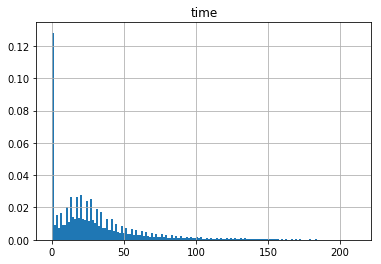

In [36]:
# time=0 인 값이 너무 많아보여서, histogram으로 다시 한번.

pd.DataFrame(tt).hist(bins=150, density = True)

histogram : 와... 0이 너무많아!

In [37]:
tmean = tt.mean()

In [38]:
# 0을 포함했을때의 평균.. 어느정도 될까?

tmean

time    29.974993
dtype: float64

---

### # drop 0 value 

    : lambda(반복 구매율) 추정에 기여할 수 없다! 어떤 이유로든 같은날 구매한거니깐!

In [39]:
# tt[['time']] 은 데이터프레임 - 0인값을 제거하는 과정

tt_drop0 = tt[tt.time != 0] 

---

In [40]:
tt_drop0.head()

,time
1,14.0
2,27.0
3,22.0
4,14.0
6,14.0


In [41]:
tt_drop0.time.value_counts()

1.0      7268
21.0     6751
14.0     6645
15.0     6476
20.0     6309
         ... 
207.0       9
209.0       6
210.0       5
208.0       2
211.0       2
Name: time, Length: 211, dtype: int64

# # Step1. 카테고리 𝐴_𝑖의 모든 개별 구매고객 𝐶_𝑗의 구매 time-interval 추출

- 1회 구매고객 제거
- 동일 일자 중복 구매 제거(time-interval : 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a02a4a8>]],
      dtype=object)

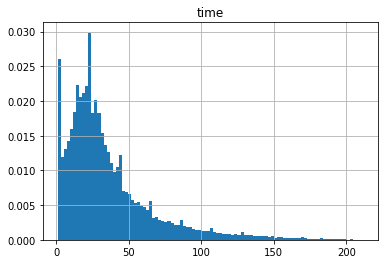

In [42]:
tt = tt.dropna()
tt_drop0 = tt[tt.time != 0]
tt_drop0.hist(bins=100, density = True)

In [44]:
#0인 관측치들 제외하고, 평균 약 35일

tt_drop0.mean()

time    35.623173
dtype: float64

---

# lambda 추정

In [46]:
diaper_diff.head()

biz_dt
m_id               
1,000,006 0     NaN
          1    14.0
          2    27.0
          3    22.0
          4    14.0

In [48]:
diaper_diff[diaper_diff.biz_dt == 0]

biz_dt
m_id                
1,000,468 5      0.0
          8      0.0
          9      0.0
          10     0.0
          14     0.0
...              ...
9,994,050 4      0.0
9,994,123 2      0.0
9,995,066 4      0.0
9,995,407 1      0.0
9,997,139 1      0.0

[52834 rows x 1 columns]

In [49]:
diaper_diff[diaper_diff.biz_dt == 0].replace(0, np.NaN) # 이렇게 대체되고

biz_dt
m_id                
1,000,468 5      NaN
          8      NaN
          9      NaN
          10     NaN
          14     NaN
...              ...
9,994,050 4      NaN
9,994,123 2      NaN
9,995,066 4      NaN
9,995,407 1      NaN
9,997,139 1      NaN

[52834 rows x 1 columns]

In [51]:
kkk = diaper_diff.replace(0, np.NaN)

In [56]:
kkk.loc['1,000,468',:] # 확인했다

,biz_dt
0,NaN
1,11.0
2,3.0
3,46.0
4,21.0
5,NaN
6,26.0
7,24.0
8,NaN
9,NaN


In [64]:
# 중복 구매 -> nan값으로(mean에 포함 안되게)
diaper_diff_without0 = diaper_diff.replace(0, np.NaN).copy()

In [73]:

diaper_diff_without0.loc['1,000,352', :]

,biz_dt
0,NaN


In [68]:
diaper_diff_without0.loc['1,000,006', :]

,biz_dt
0,NaN
1,14.0
2,27.0
3,22.0
4,14.0


In [72]:
np.mean([14,27,22,14])

19.25

In [65]:
# m_id별로 groupby
diaper_diff_without0_groupby = diaper_diff_without0.reset_index()
diaper_diff_without0_groupby.drop(columns = ['level_1'], inplace=True)

In [66]:
diaper_diff_without0_groupby

,m_id,biz_dt
0,"1,000,006",NaN
1,"1,000,006",14.0
2,"1,000,006",27.0
3,"1,000,006",22.0
4,"1,000,006",14.0
...,...,...
545770,"9,999,834",NaN
545771,"9,999,834",43.0
545772,"9,999,834",55.0
545773,"9,999,834",19.0


In [67]:
diaper_diff_without0_groupby.groupby('m_id').mean()

,biz_dt
m_id,
"1,000,006",19.250000
"1,000,087",30.166667
"1,000,192",48.666667
"1,000,333",41.000000
"1,000,352",NaN
...,...
"9,999,537",77.000000
"9,999,726",NaN
"9,999,762",120.000000


In [74]:
diaper_diff_without0_groupby_mean = diaper_diff_without0_groupby.groupby('m_id').mean()

In [75]:
diaper_diff_without0_groupby_mean.dropna()

,biz_dt
m_id,
"1,000,006",19.250000
"1,000,087",30.166667
"1,000,192",48.666667
"1,000,333",41.000000
"1,000,468",20.500000
...,...
"9,999,212",33.000000
"9,999,268",39.800000
"9,999,537",77.000000


In [81]:
diaper_diff_without0_groupby_mean.dropna()['biz_dt'].values

array([ 19.25      ,  30.16666667,  48.66666667, ...,  77.        ,
       120.        ,  32.        ])

In [93]:
tt_drop0_m = diaper_diff_without0_groupby_mean.dropna()

In [94]:
tt_drop0_m

,biz_dt
m_id,
"1,000,006",19.250000
"1,000,087",30.166667
"1,000,192",48.666667
"1,000,333",41.000000
"1,000,468",20.500000
...,...
"9,999,212",33.000000
"9,999,268",39.800000
"9,999,537",77.000000


In [95]:
tt_drop0_m.shape

(103648, 1)

In [96]:
tt_drop0_m.mean()

biz_dt    44.974998
dtype: float64

In [85]:
1/44

0.022727272727272728

In [120]:
1/44*7

0.1590909090909091

---

## # Step2. # Gamma 분포 alpha, beta 추정(MLE)

#### * lambda
poisson(lambda) : 이때의 lambda는 단위시간 당 사건의 평균적인 발생 횟수. - 이를 추정하기 위해, 단위 시간 당 사건의 발생횟수의 분포를 본다.

'반복구매율'(지수분포)을 통한(lambda) : 고객들이 반복 구매를 나타내는 정도를 나타내는 수치 -> 1/time-interval 인 <U>'단위 시간 당 사건의 발생횟수'</U>로 본다.

In [1]:
# 예로, 평균적인 repeat purchase daya : 35일 -> 하루마다 약 0.028씩 구매사건이 일어난다!

1/35

0.02857142857142857

In [97]:
tt_drop0_m.mean()

biz_dt    44.974998
dtype: float64

In [98]:
# tt_drop0의 inverse를 사용할 것이다.

tt_inver = 1/tt_drop0_m

In [100]:
tt_inver.head()

,biz_dt
m_id,
"1,000,006",0.051948
"1,000,087",0.033149
"1,000,192",0.020548
"1,000,333",0.024390
"1,000,468",0.048780


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13be9aba8>]],
      dtype=object)

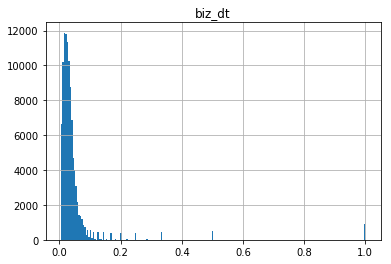

In [101]:
tt_inver.hist(bins=210)

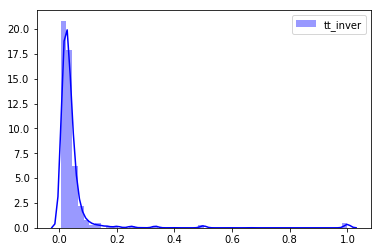

In [102]:
# tt_inver 의 분포를 살펴보는거야

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

### # step2-(2). time-interval 단위를 변환한다면? - 1주일 단위로

# #  Step2.  Gamma 분포 $\alpha$, $\beta$ 추정(MLE)

### * 고객들의 반복구매율 $\lambda$
> - X ~ Poisson($\lambda$) :  단위시간 당 사건의 평균적인 발생 횟수 

> - X ~ Exp($\lambda$) :  사건 발생까지의 평균적인 시간들의 역수

In [103]:
# 1/time 활용 : 단위시간'일주일'
tt_inver7 = tt_inver*7

In [142]:
# Gamma-fitting 후, 파라미터 추정량 확인
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 
print('* alpha : {}, scale : {}, alpha*scale : {}'.format(alpha_, scale_, alpha_*scale_))
print('* mean of tt_inevr7 : {}'.format(tt_inver7.mean().values))

* alpha : 1.1671751660963352, scale : 0.28244676995986034, alpha*scale : 0.3296648556412734
* mean of tt_inevr7 : [0.32966486]


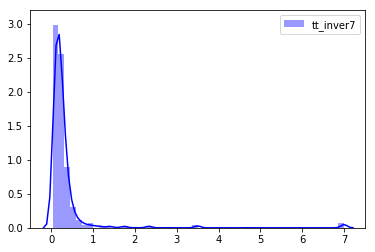

In [125]:
plt.figure()
sns.distplot( tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
plt.xlim(-0.5, 7.5)
plt.ylim( 0, 3.2)

plt.show()
plt.close()

In [1]:
0.3296648556412734/7

0.04709497937732477

In [128]:
alpha_*scale_

0.3296648556412734

In [133]:
y_ = stats.gamma.rvs(a = alpha_ , scale=scale_ , size = tt_drop0.shape[0])

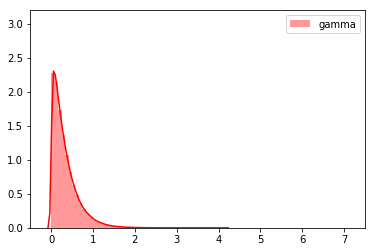

In [134]:
plt.figure()
sns.distplot( y_, color = 'red', label='gamma')
plt.legend()
plt.xlim(-0.5, 7.5)
plt.ylim( 0, 3.2)

plt.show()
plt.close()

---

---

## # Step3. # step2의 계산된 𝛼, 𝛽를 통해 ‘고객들의 재구매율’을 나타내는 parameter 𝜆(lambda)를 추정.

In [120]:
# 함수로 정의 : time-interval 단위 '하루'
# 고객의 k, t, t_purch, t_mean, 고객당 lambda 계산 값 계산


def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if k <= 1 :
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

In [139]:
# time-interval 단위 '일주일'.
# 고객의 k, t, t_purch, t_mean, 고객당 lambda 계산 값 계산


def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days/7
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if k <= 1 :
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days/7
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

---

## # Step4. # 계산된 ’𝜆(lambda)’를 이용하여, ‘고객 시점별 제품 구매확률’ 계산.
- P(고객이 제품을 구매할 확률) = 1 - P(고객이 제품을 구매 X)

In [ ]:
# simple하게, '현재 시점'에 의해 lambda값이 계산되기에, 아래 값을 이용하면 현재시점에서 score 계산 가능 

1-stats.poisson.pmf(mu = lamb, k=0)

---

## (Test)# RCP 부분을 제외한, test 진행!

### # (1) test id 정의

In [37]:
# Test_id : 테스트 데이터에서, unique한 id 1000개

test_id = diaper_test.m_id.unique()[:1000]

In [96]:
# test_id 1000개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id)):
    tf.append( bool(diaper_train[diaper_train.m_id == test_id[i]].shape[0]) 
              & bool(diaper_test[diaper_test.m_id == test_id[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

### # (2) test 기간 정의

In [141]:
# 설정한 current에서 한달 정도의 기간을 만들어준다.

current_l = pd.date_range('2018-08-01', periods=30).tolist()

---

In [181]:
# user[10] 에 대해서만 해볼게.
d={}

j=10

d[j] = []
for i in range(len(current_l)):     ## 8월 한달간에 대해서!
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0.mean().item()/7 , current=current_l[i])
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', diaper_train.biz_dt[diaper_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
        d[j].append( (1-stats.poisson.pmf(mu = lamb, k=0)) )

user:[10] last order: 9109044   2018-07-31 23:58:04
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 0.0 t_purch: 0.0
pred: 0.1492609718844462 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 0.14285714285714285 t_purch: 0.0
pred: 0.15262529603615016 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 0.2857142857142857 t_purch: 0.0
pred: 0.1561443769006401 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 0.42857142857142855 t_purch: 0.0
pred: 0.1598291112140694 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 0.5714285714285714 t_purch: 0.0
pred: 0.16369143967784472 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 0.7142857142857143 t_purch: 0.0
pred: 0.1677444745267762 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 0.857142

current: 2018-09-28 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.0
pred: 0.21180363281332593 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-09-29 00:00:00 current-last_order: 8.428571428571429 t_purch: 0.0
pred: 0.20539396797631326 , tmean_u: 5.100639366580533 , k: 1 



---

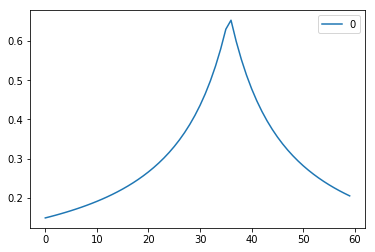

In [104]:
# user[10] : last-order가 7월 31일이다. 

sns.lineplot(data = pd.DataFrame(d[10]), color = 'red')
#plt.legend()
#plt.xlim(0,30)
#plt.ylim(0.15,0.4)

plt.show()
plt.close()

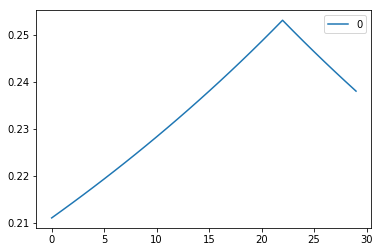

In [93]:
sns.lineplot(data = pd.DataFrame(d[9]), color = 'coral')
#plt.legend()
#plt.xlim(0,30)
#plt.ylim(0.15,0.4)

plt.show()
plt.close()

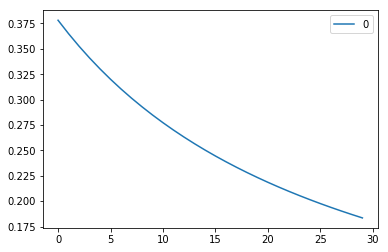

In [88]:
sns.lineplot(data = pd.DataFrame(d[4]), color = 'coral')
#plt.legend()
#plt.xlim(0,30)
#plt.ylim(0.15,0.4)

plt.show()
plt.close()

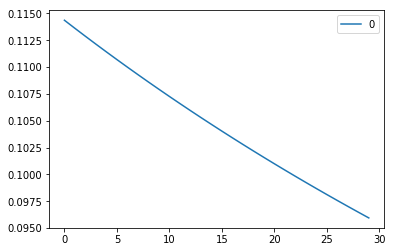

In [85]:
sns.lineplot(data = pd.DataFrame(d[2]), color = 'coral')
#plt.legend()
#plt.xlim(0,30)
#plt.ylim(0.15,0.4)

plt.show()
plt.close()

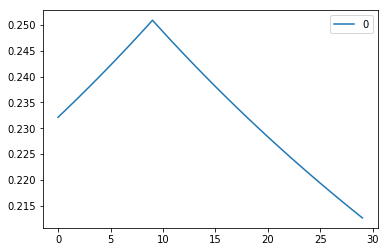

In [84]:
sns.lineplot(data = pd.DataFrame(d[1]), color = 'coral')
#plt.legend()
#plt.xlim(0,30)
#plt.ylim(0.15,0.4)

plt.show()
plt.close()

---
---

# 알고리즘 수정사항

## # 1. time 단위 설정 : '일주일' & 고객의 구매 history 기간 설정('8개월')

아래 식 (7)을 통해 살펴보면 $\alpha$=1, $\beta$=1, $k$=5 이라 가정할때, 단위 시간으로 추정된 $\lambda$는 상이한 것을 알 수 있다.
- (1) $t=70$ 인 경우 : $\lambda = 0.084$
- (2) time 단위를 '주'로 설정하여 $t=10$으로 계산 : $\lambda = 0.54$



<img src="equation_7.png" alt="Drawing" style="width: 500px;"/>
---


- 때문에, $\lambda$를 추정하는데 있어서 적절한 unit-time 이 사용되어야 한다.


- 또한 고객의 구매 history를 살피는 기간을 설정하지 않은경우 $t$ 값이 폭발적으로 커질 수 있기 때문에, <br/>구매 history를 살피는 기간을 설정하여 $t$ 값이 커지는 상한선을 설정할 수 있다.

---

## # 2. Scaling 을 통한 노출 기간 설정

### 2.1 Scaling 의 필요성

- 반복 구매 추천은 상시 적용되어선 안되고, 구매 시점이 도래했을때 노출되는 것이 효과적이라 판단
> -  **Scaling의 필요성** : 고객의 카테고리별 구매성향에 의해서 $\lambda$는 다르게 추정되고, 이는 추정되는 구매확률 범위의 다름을 야기
<br>eg.  $A_1$ 카테고리의 확률값은 아무리 높아도 0.5인 반면, $A_2$ 카테고리는 0.9 밑으로 값이 떨어지지 않는 경우가 존재


- **제한사항** : $t$가 증가할수록 $\lambda$ 값이 지속적으로 감소하는 문제로 **'평균적인 구매주기의 2배'** 이상의 시간이 경과하였을 경우 $t = 2*t_{mean}$으로 대체하고,<br/> 이를 통해 $\lambda_{min}$ 값과 $\lambda_{max}$ 값을 통해 확률값의 Scaling을 진행

<img src="equation_9.png" alt="Drawing" style="width: 500px;"/>

<img src="lambda_time.png" alt="Drawing" style="width: 500px;"/>

---

### 2.2 Scaling 을 통한 노출 기간 설정

- scaling 점수(0~1)를 통해 반복 구매 추천의 **'노출 기간'**을 설정
- **scaling 기준 점수 0.5** : 추천 시점으로부터 +/- 3days를 통해, 80%의 고객 노출 형성
- 일주일의 노출기간으로 약 22%의 반복 구매 고객을 잡을 수 있을것이라 예측됨

### peak - 3days

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e3032b0>]],
      dtype=object)

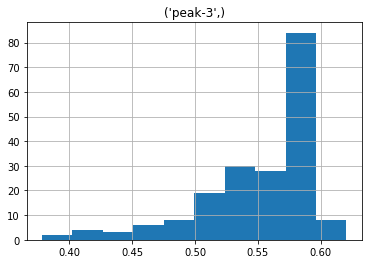

In [166]:
peak_s['peak-3'].hist(bins=10)

In [178]:
peak_s['peak-3'].describe()

,peak-3
count,192.000000
mean,0.554771
std,0.048032
min,0.378207
25%,0.529565
50%,0.569674
75%,0.594193
max,0.620396


In [197]:
(peak_s['peak-3'].values>0.5).sum()  # 192-169 = 23개는 0.5 미만

169

In [16]:
23/192*100

11.979166666666668

---

### peak + 3days

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e3dff60>]],
      dtype=object)

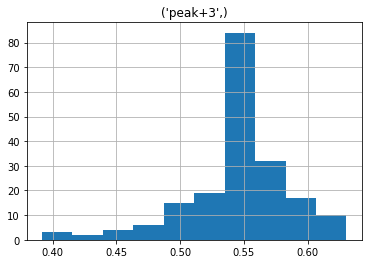

In [167]:
peak_s['peak+3'].hist(bins=10)

In [168]:
peak_s['peak+3'].describe()

,peak+3
count,192.000000
mean,0.542701
std,0.039826
min,0.391595
25%,0.534017
50%,0.538517
75%,0.570587
max,0.630358


In [198]:
(peak_s['peak+3'].values>0.5).sum() ## 192-171 = 21개는 0.5를 못넘는다

171

In [15]:
21/192*100

10.9375

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))